In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [41]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


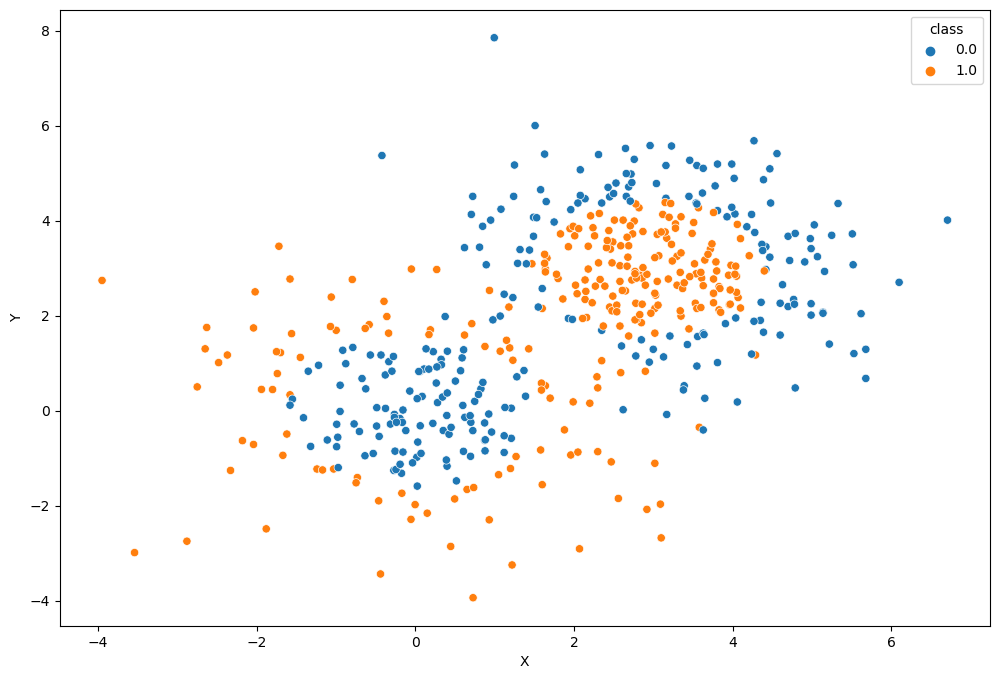

In [42]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

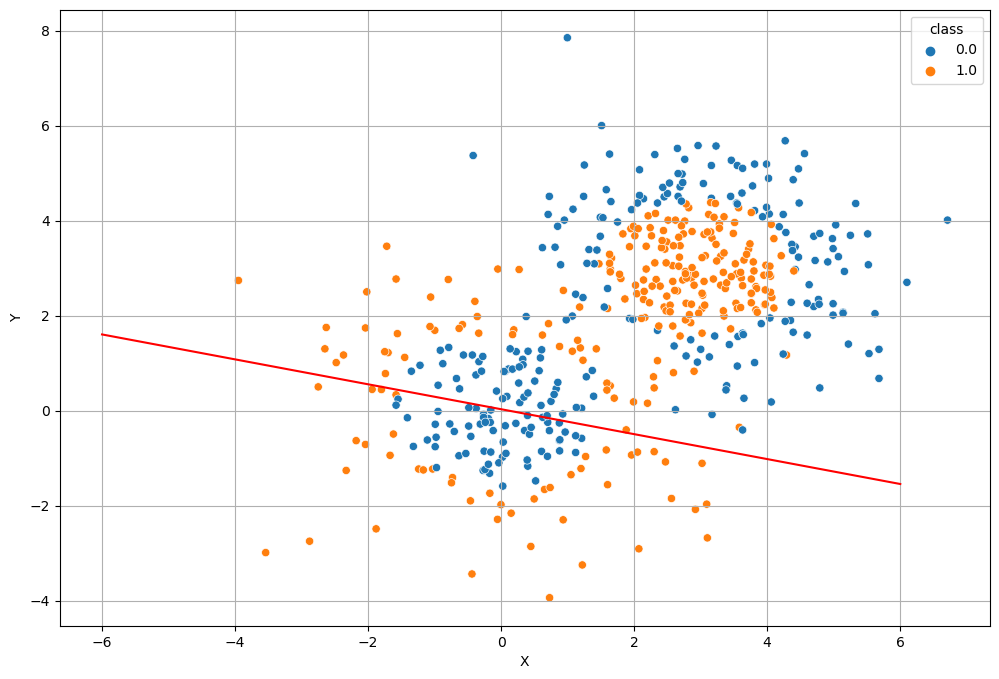

In [43]:
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions


### Your code is here
X = circ.drop('class',axis=1)
y = circ['class']

model_lreg = LogisticRegression()
model_lreg.fit(X, y)
model_lreg.decision_function



w_1 = model_lreg.coef_[0][0]
w_2 = model_lreg.coef_[0][1]
w_0 = model_lreg.intercept_[0]

sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])
x = np.linspace(-6,6,100)
plt.grid()
plt.plot(x, [(i*(-w_1/w_2) + w_0) for i in x], c='r')


In [44]:
w_0 = model_lreg.intercept_[0]
w_0

0.0284847038350686

<Axes: >

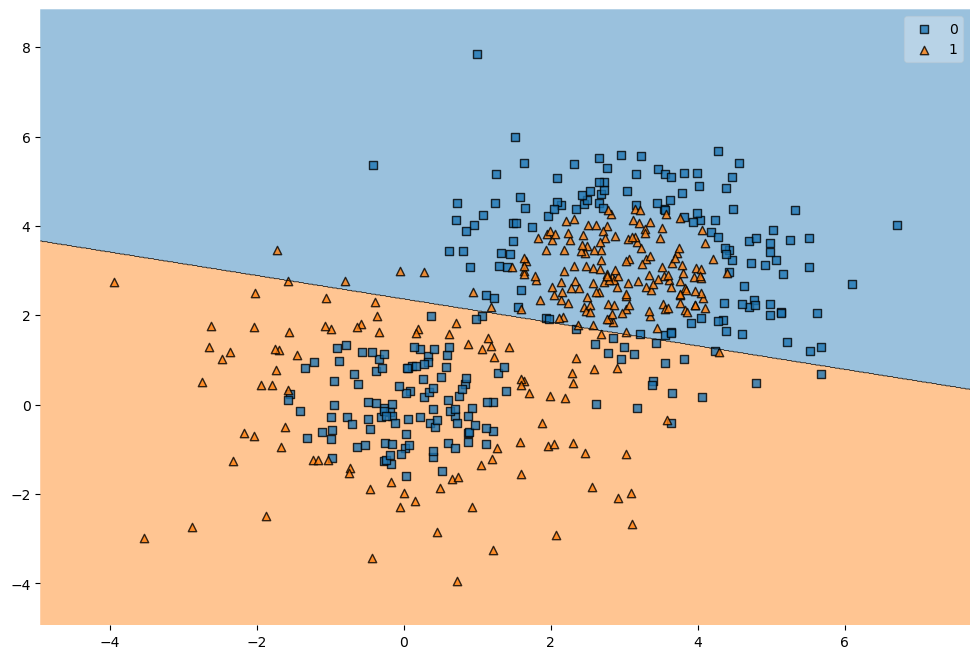

In [45]:

plot_decision_regions(X=X.to_numpy(),y=y.to_numpy().astype(np.int_),clf=model_lreg)

In [46]:
model_lreg.score(X, y)

0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [47]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

all_clfs = []
### Your code is here
for k in all_k:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    print(f"Number neighbours: {k} \nScore train: {model_knn.score(X_test, y_test)}")
    all_clfs.append(model_knn)


Number neighbours: 1 
Score train: 0.89
Number neighbours: 3 
Score train: 0.87
Number neighbours: 10 
Score train: 0.85
Number neighbours: 30 
Score train: 0.74
Number neighbours: 40 
Score train: 0.75
Number neighbours: 60 
Score train: 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [2]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [3]:
for i in itertools.product([1, 2, 3, 4], [1, 2, 3, 4, 5]):
    print(i)
gs = gridspec.GridSpec(3, 2)
print(gs)

(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(3, 1)
(3, 2)
(3, 3)
(3, 4)
(3, 5)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
GridSpec(3, 2)


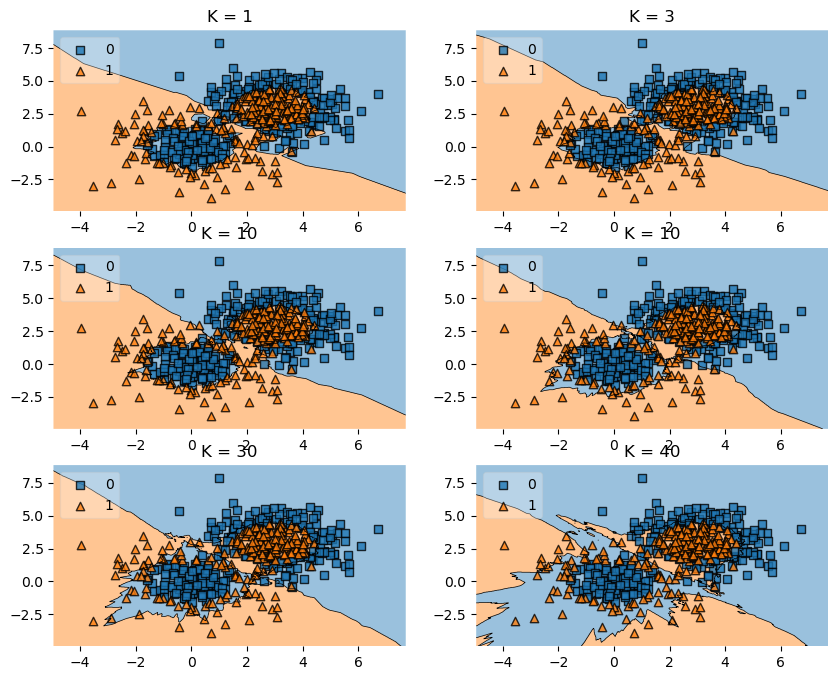

In [60]:
### Your code is here
gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(10,8))

labels = ['K = 1', 'K = 3', 'K = 10', 'K = 10', 'K = 30', 'K = 40', 'K = 60']
for clf, lab, grd in zip(all_clfs,
                         labels,
                         itertools.product([0, 1, 2], [0,1])):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()


1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [15]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
### Your code is here
std = StandardScaler()
X_std_train = std.fit_transform(X_train)
X_std_test = std.fit_transform(X_test)

for k in [1,5,10]:
    model_knn_std = KNeighborsClassifier(n_neighbors=k)
    model_knn_std.fit(X_std_train, y_train)
    
    
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    print(f"Number neighbours: {k} \nScore test: {model_knn.score(X_test, y_test)} \nScore std test: {model_knn_std.score(X_std_test, y_test)}")






Number neighbours: 1 
Score test: 0.43819542019519236 
Score std test: 0.5641970151520905
Number neighbours: 5 
Score test: 0.44317016671097104 
Score std test: 0.6304636767554019
Number neighbours: 10 
Score test: 0.4703603843086621 
Score std test: 0.6615273611058368


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [21]:
### Your code is here

model_knn_std = KNeighborsClassifier(n_neighbors=10, p=1)
model_knn_std.fit(X_std_train, y_train)
model_knn_std.score(X_std_test, y_test)



0.6617552120912923

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [22]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


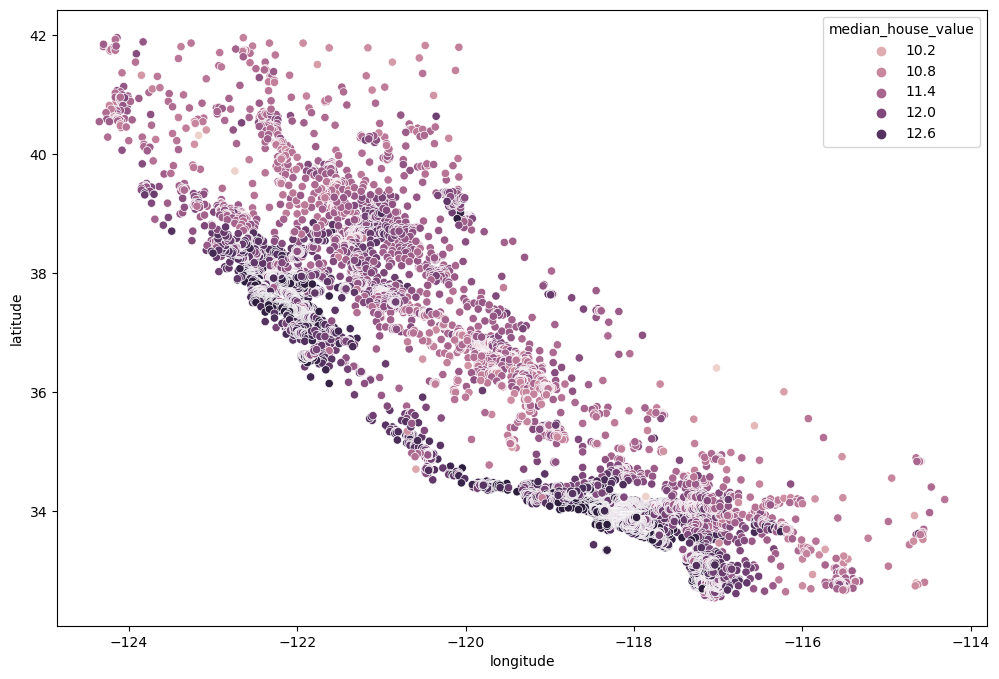

In [36]:
X = df[['longitude', 'latitude']]
y = np.log(df['median_house_value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot( x=X['longitude'], y=X["latitude"], hue=y);

In [37]:
### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

# model_lin.score(X_test, y_test)
print(f"Score linreg {model_lin.score(X_test, y_test)}")

pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsRegressor())])

for k in range(1, 10):
    pipe.fit(X_train, y_train)
    pipe.set_params(knn__n_neighbors = k)
    print( f"k = {k} \nscore = {pipe.score(X_test, y_test)}" )



Score linreg 0.3283043834032934
k = 1 
score = 0.7130575401897118
k = 2 
score = 0.7816209556049563
k = 3 
score = 0.7976006027512638
k = 4 
score = 0.8036675665790275
k = 5 
score = 0.8076827132408588
k = 6 
score = 0.8074547456280139
k = 7 
score = 0.8067441977344624
k = 8 
score = 0.8047803540332069
k = 9 
score = 0.8034869330751453


h = 0.02 
score = 0.8068056374812125
h = 0.03 
score = 0.8076307386977196
h = 0.039999999999999994 
score = 0.8076668849829431
h = 0.049999999999999996 
score = 0.8077170754100153
h = 0.06 
score = 0.8077359858407493
h = 0.06999999999999999 
score = 0.80770549135251
h = 0.07999999999999999 
score = 0.8076581415516574
h = 0.09 
score = 0.807610800528876


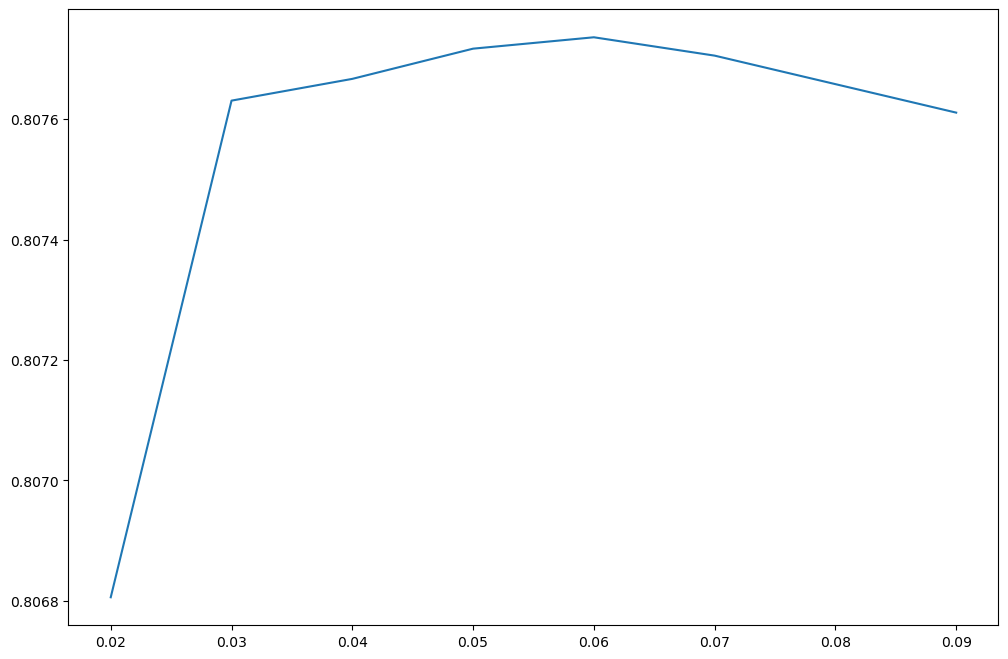

In [38]:
res_score = []

for h in np.arange(0.02, 0.1, 0.01):
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)
    
    pipe.fit(X_train, y_train)
    params = {"knn__n_neighbors": 7, "knn__weights": kernel}
    pipe.set_params(**params)
    res_score.append( pipe.score(X_test, y_test))
    print( f"h = {h} \nscore = {pipe.score(X_test, y_test)}" )
    

plt.plot(np.arange(0.02, 0.1, 0.01), res_score)